In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib notebook
from assignment1 import assignment1, plot_scatter


animals_csv = pd.read_csv("zoo.data", header=None, 
            names = ["animal", "hair", "feathers", "eggs", "milk", "airborne",
                     "aquatic", "predator", "toothed", "backbone", "breathes",
                     "venomous", "fins", "legs", "tail", "domestic", "catsize",
                     "type"]
                    )
animals = animals_csv.copy()


class_mapping = {
    1:"Mammal",
    2 : "Bird",
    3 : "Reptile",
    4 : "Fish",
    5 : "Amphibian", 
    6 : "Bug", 
    7 : "Invertebrate"
}
animals['type'] = animals['type'].replace(class_mapping)

animals_nolegs = animals.drop(['legs'], axis=1)

#Hot econding of the legs variable
animals_he =  pd.get_dummies(animals, columns=["legs"])
animals_he.head(2)



animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   

   backbone  ...  tail  domestic  catsize    type  legs_0  legs_2 legs_4  \
0         1  ...     0         0        1  Mammal       0       0      1   
1         1  ...     1         0        1  Mammal       0       0      1   

   legs_5  legs_6  legs_8  
0       0       0       0  
1       0       0       0  

[2 rows x 23 columns]

In [2]:
ass1 = assignment1(animals_he, ['type', 'animal'], 4)
ass1.pca_sklearn()
ass1.pca_svd()
ass1.mds_distance_matrix()
ass1.calculate_information_gain()
ass1.mds_distance_matrix_importance()


type    animal         0         1         2         3
0          Mammal  aardvark  1.895392 -0.142066 -0.261431  0.176666
1          Mammal  antelope  2.279556 -0.251259  0.017790 -0.456277
2            Fish      bass -1.043908  2.176214  0.934211  0.081706
3          Mammal      bear  1.895392 -0.142066 -0.261431  0.176666
4          Mammal      boar  2.288168 -0.250400  0.019153 -0.476541
..            ...       ...       ...       ...       ...       ...
96         Mammal   wallaby  1.491108 -0.338362  0.248524  1.520551
97            Bug      wasp -0.970606 -0.331837 -1.948421  0.554102
98         Mammal      wolf  2.288168 -0.250400  0.019153 -0.476541
99   Invertebrate      worm -1.422245  0.237806 -1.547763 -0.050433
100          Bird      wren -1.852370 -1.667089  0.853213 -0.058433

[101 rows x 6 columns]

<IPython.core.display.Javascript object>


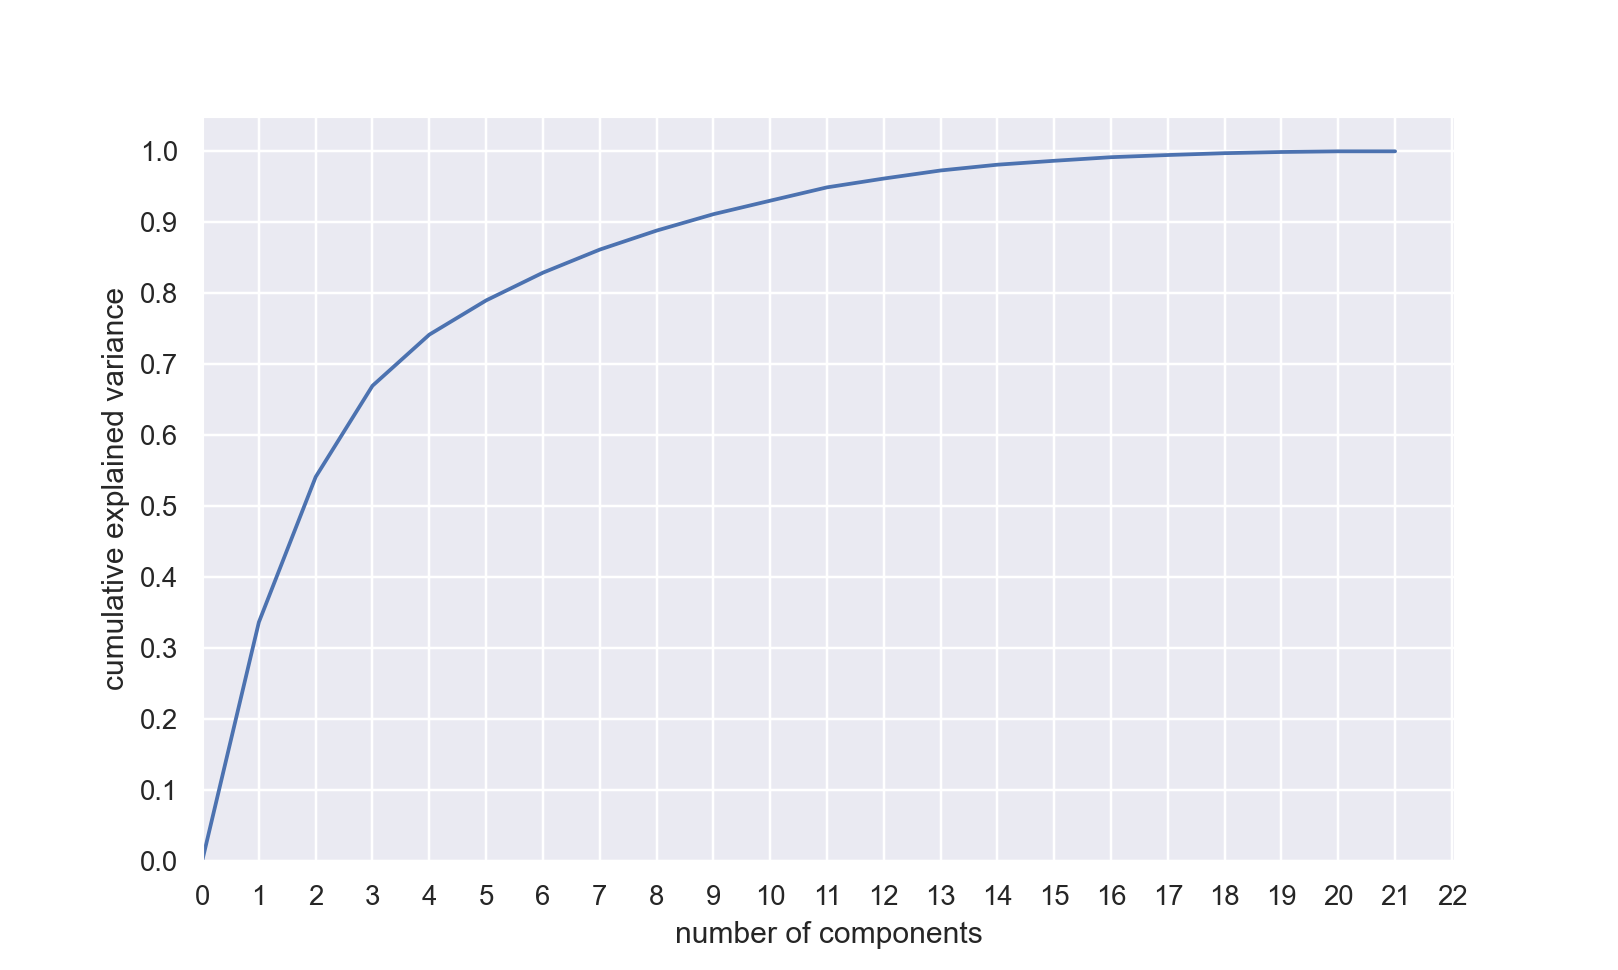

In [3]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
explained_variance = np.cumsum(ass1.explained_variance_ratio_)
explained_variance = np.insert(explained_variance, 0, 0, axis=0)
plt.plot(explained_variance)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<IPython.core.display.Javascript object>


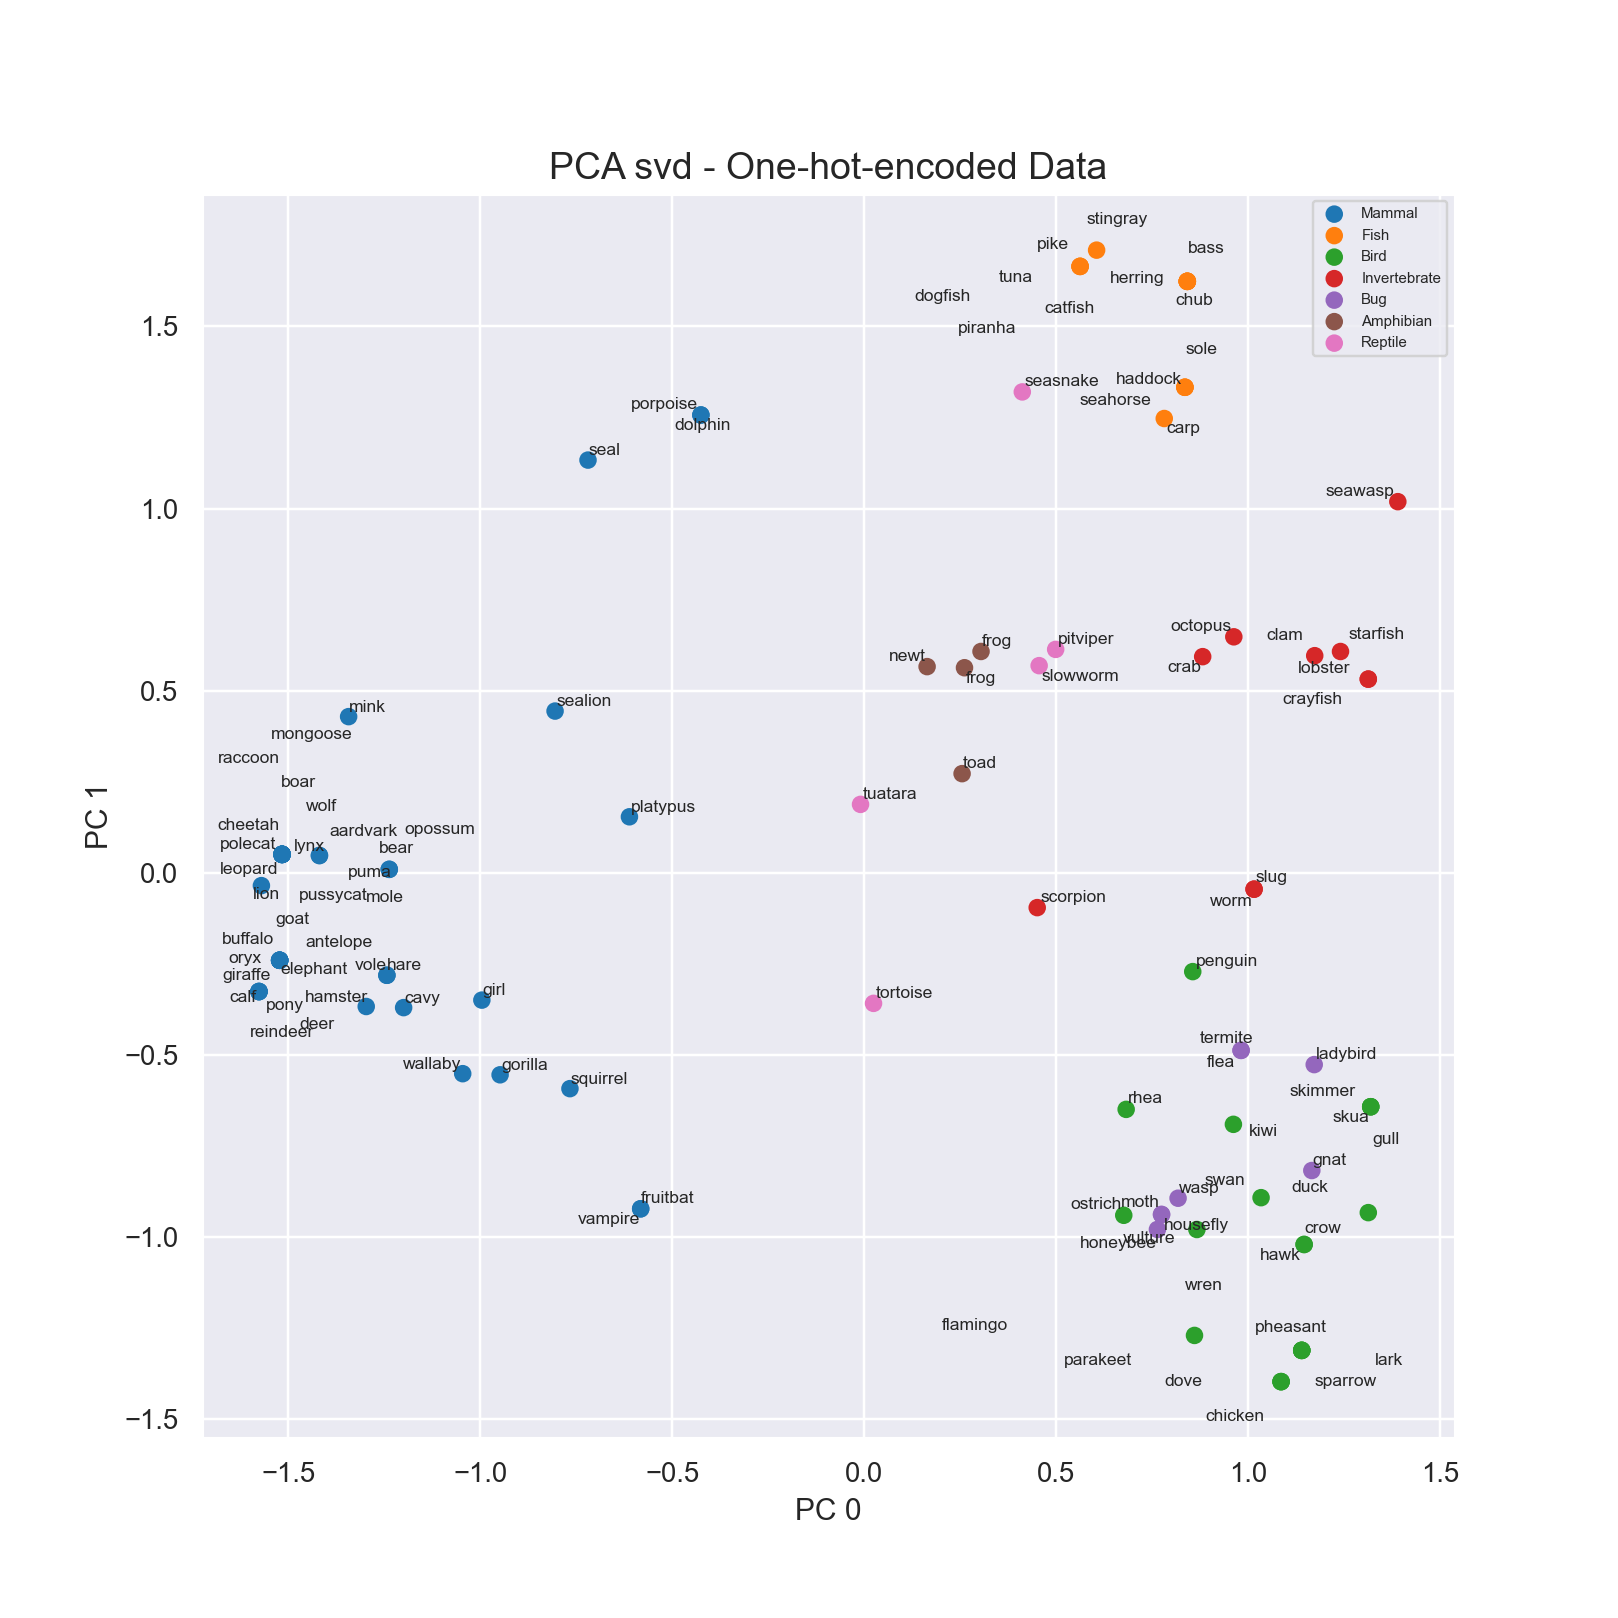

<AxesSubplot:title={'center':'PCA svd - One-hot-encoded Data'}, xlabel='PC 0', ylabel='PC 1'>

In [4]:
plot_scatter(ass1.animals_k_pca_df, "PCA svd - One-hot-encoded Data", fsize=(7,7), axis_text = "PC ", save="images/")

In [5]:
# plot_scatter(ass1.animals_k_pca_df, "PCA svd - One-hot-encoded Data", None, True, (5,5), "PC ", ["2", "3"])

<IPython.core.display.Javascript object>


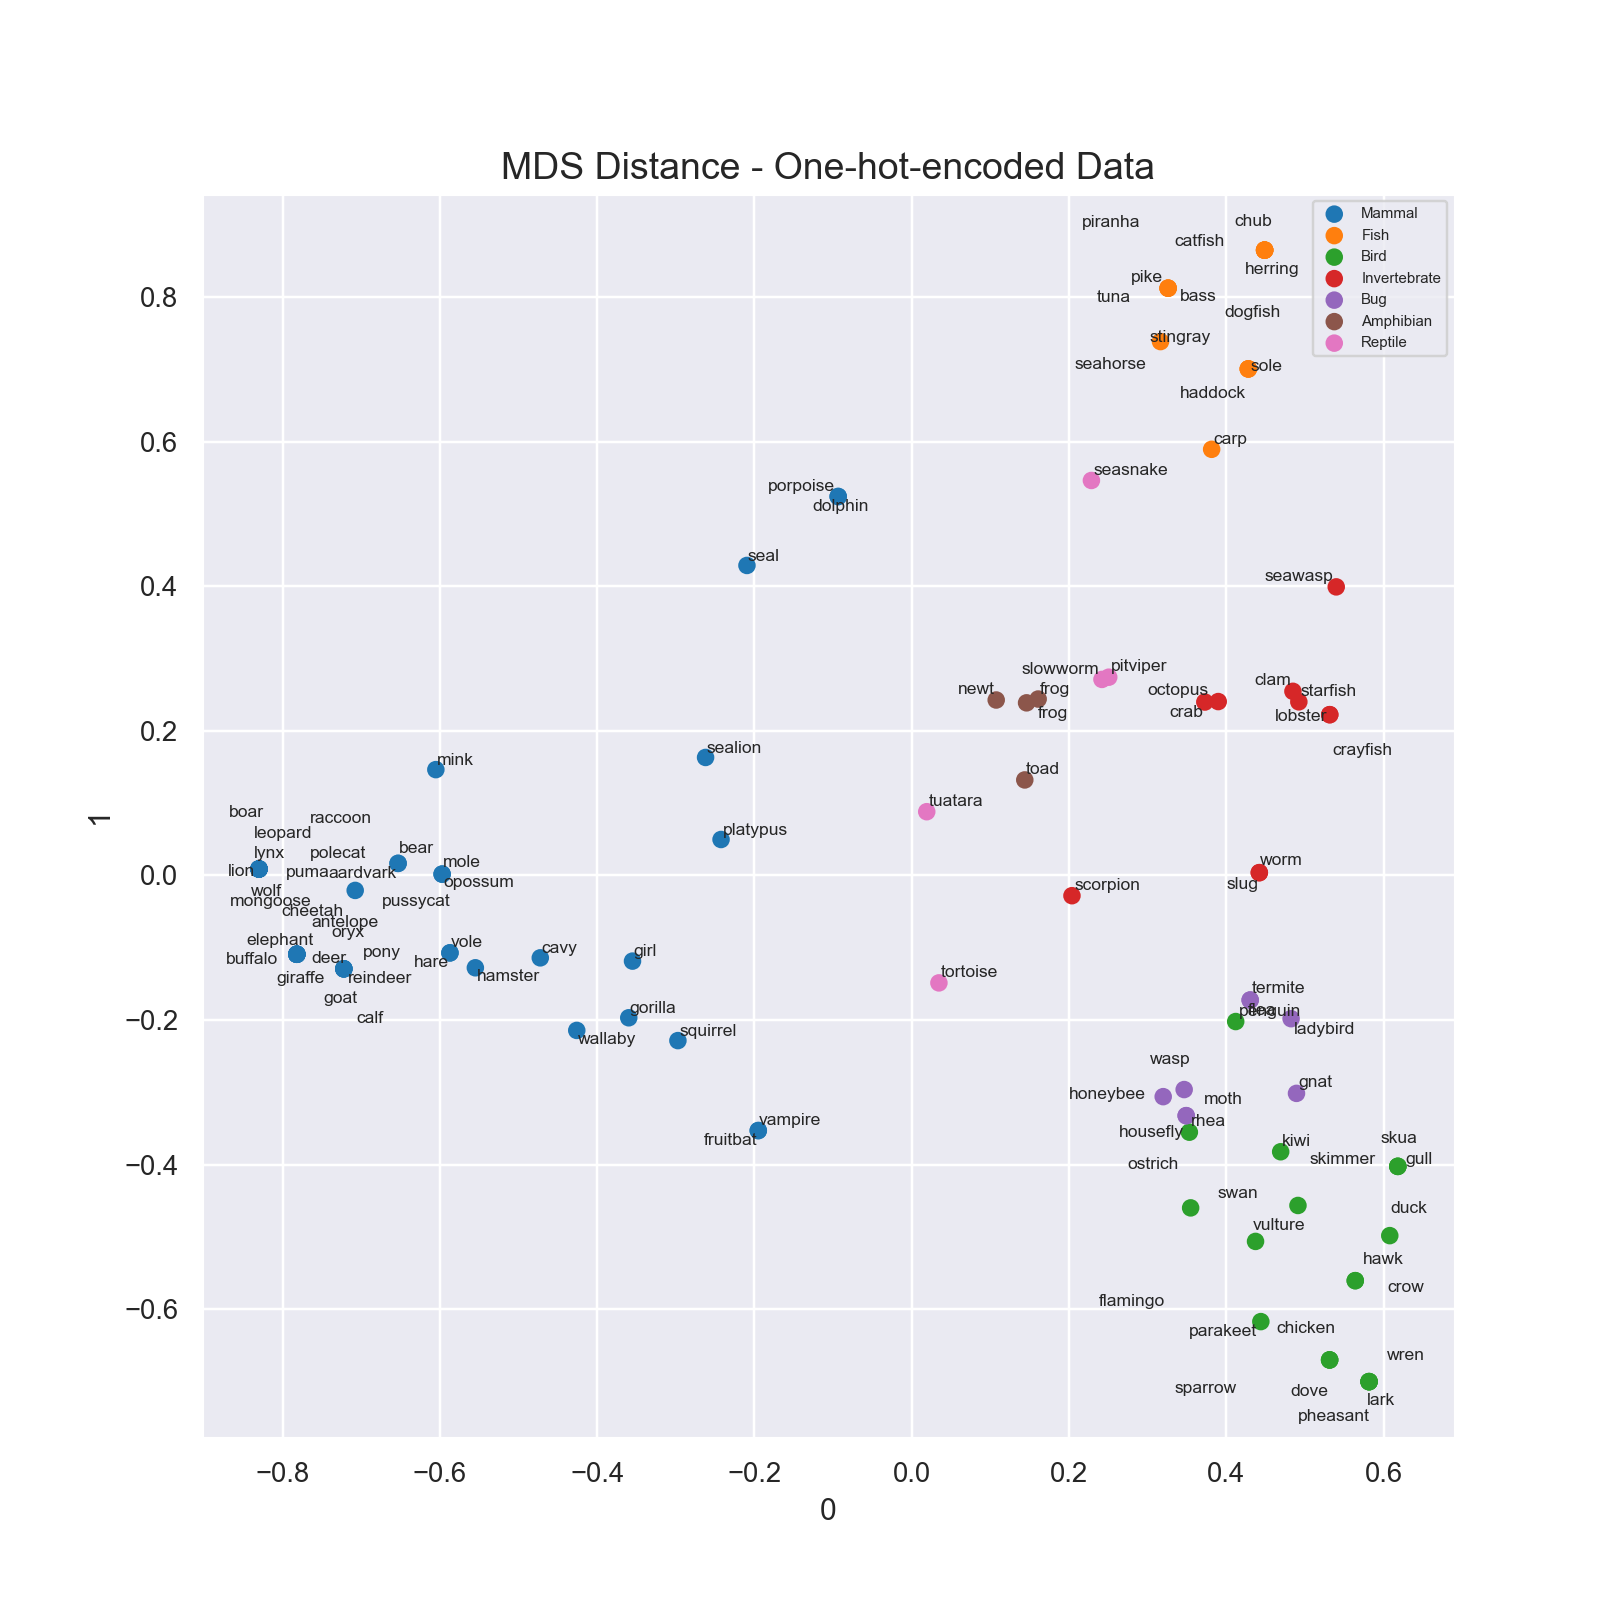

<AxesSubplot:title={'center':'MDS Distance - One-hot-encoded Data'}, xlabel='0', ylabel='1'>

In [4]:
plot_scatter(ass1.animals_k_mds_df, "MDS Distance - One-hot-encoded Data", fsize=(5,5), axis_text = "")

In [12]:
ass1.information_gain_df

feature  information_gain
0       milk          0.974320
1    toothed          0.865694
2       eggs          0.830138
3       hair          0.790675
4   feathers          0.717950
5   backbone          0.676163
6   breathes          0.614494
7     legs_2          0.569935
8     legs_4          0.535490
9       tail          0.500460
10    legs_0          0.476518
11  airborne          0.469703
12      fins          0.466614
13    legs_6          0.394371
14   aquatic          0.389487
15   catsize          0.308490
16  venomous          0.133090
17  predator          0.093447
20    legs_8          0.068849
18  domestic          0.050669
19    legs_5          0.033701

<IPython.core.display.Javascript object>


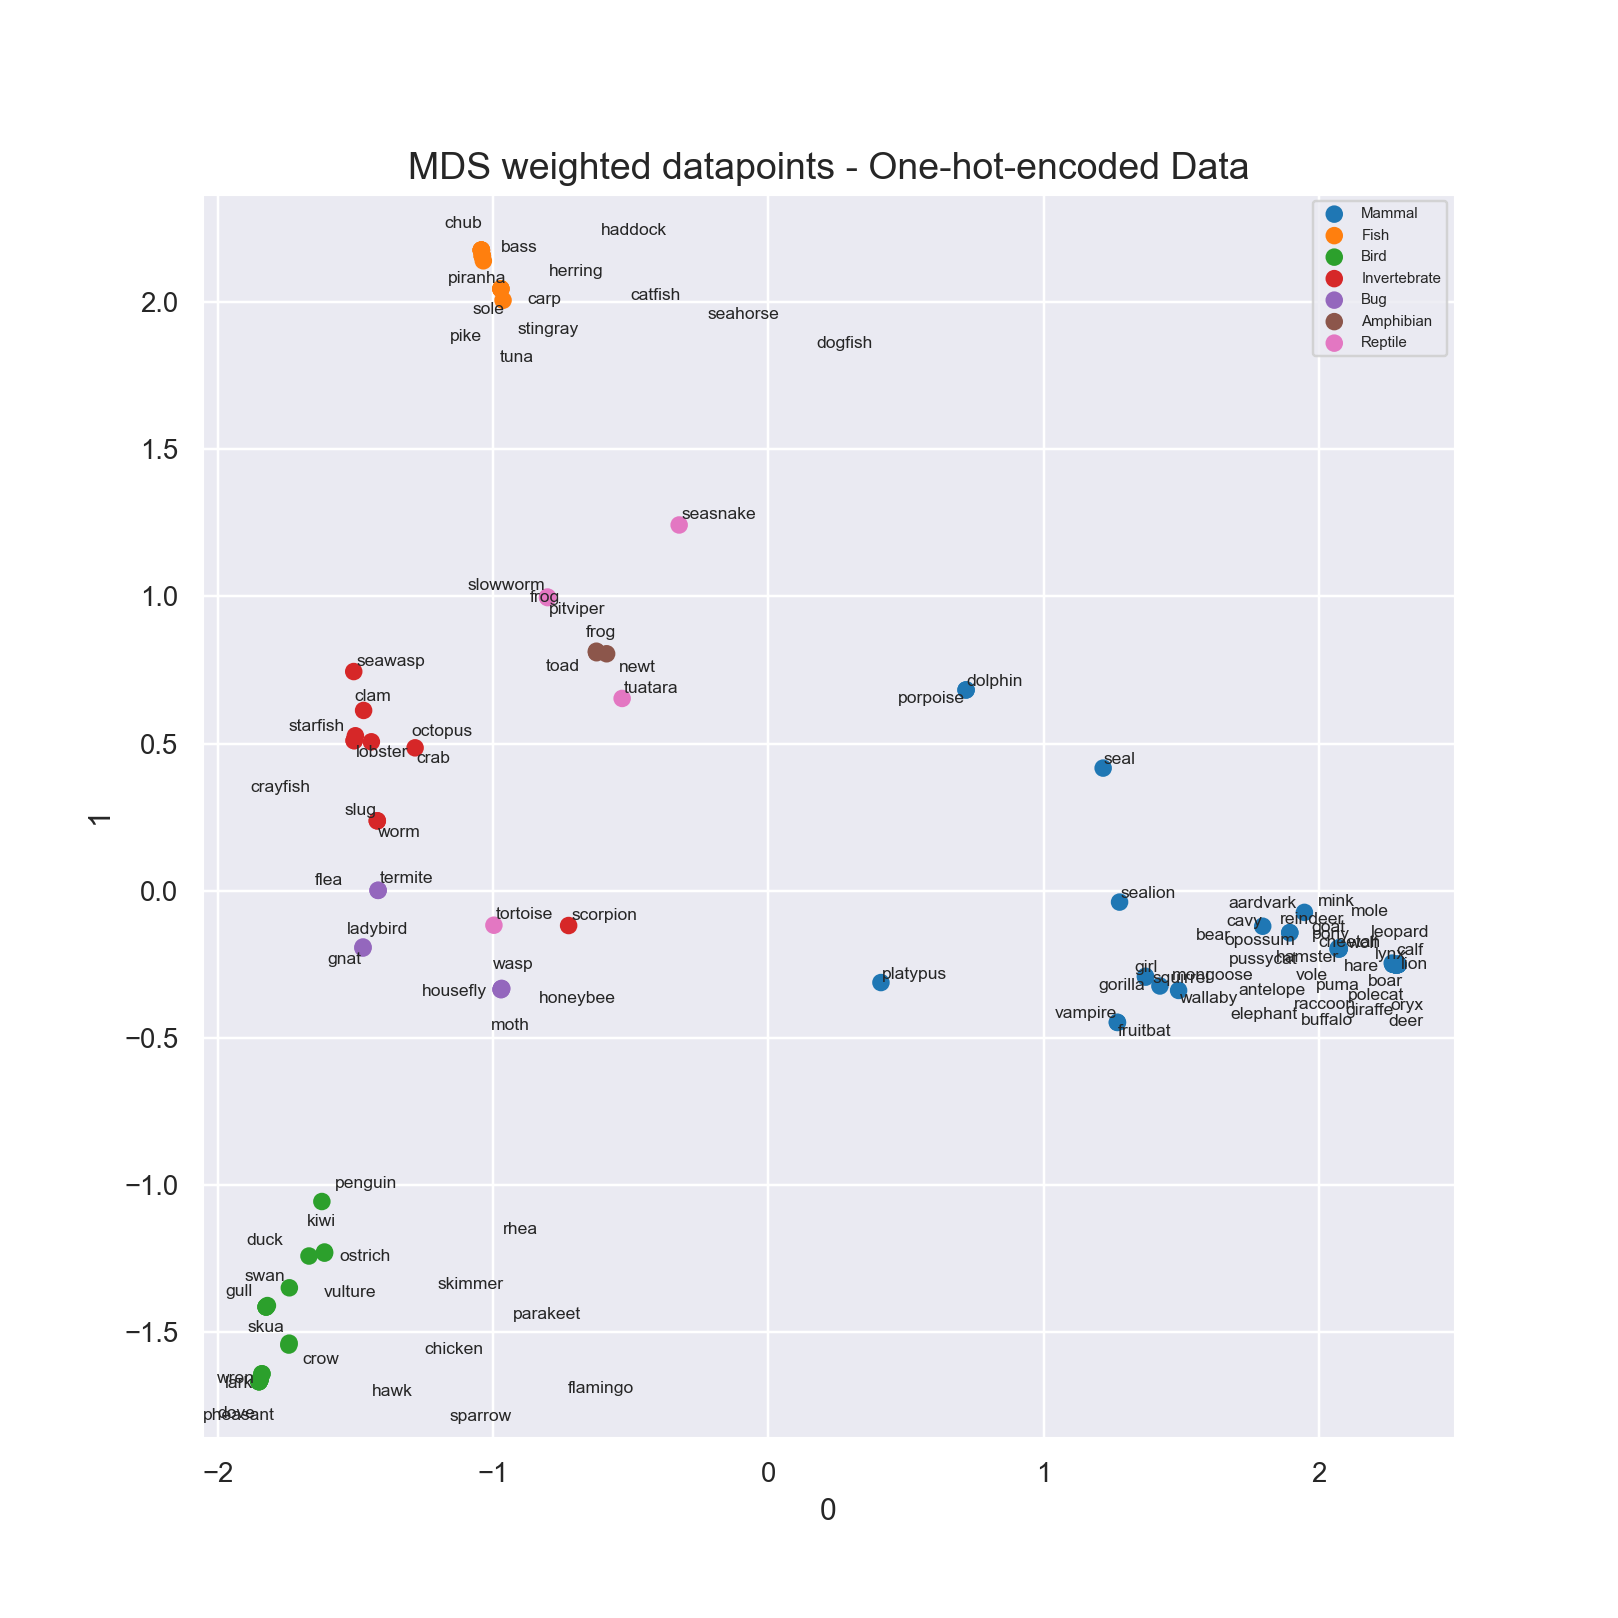

In [5]:
ax = plot_scatter(ass1.weighted_animals_k_mds_df, "MDS weighted datapoints - One-hot-encoded Data", fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


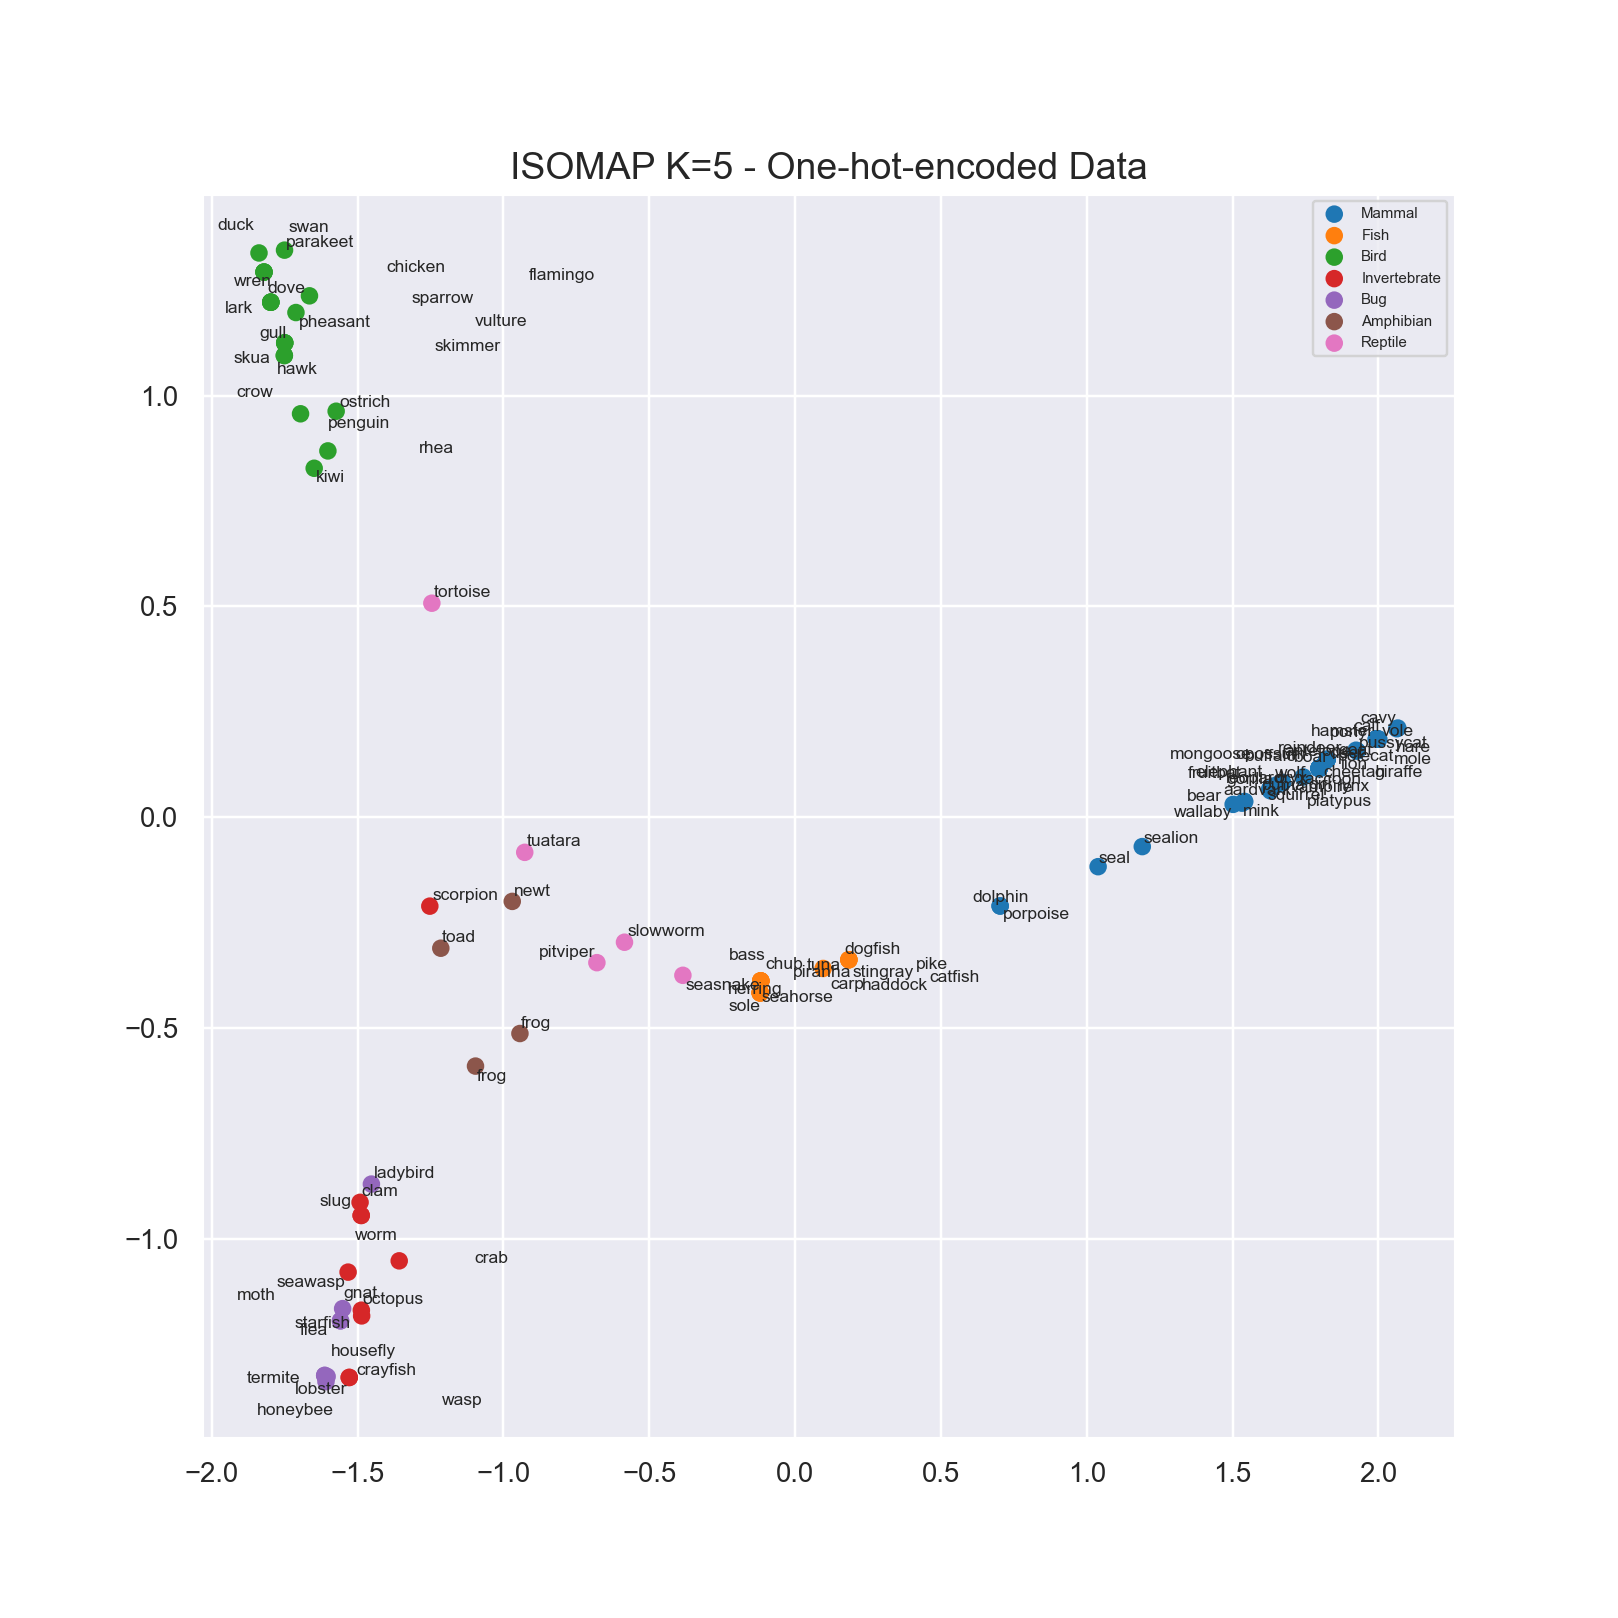

In [3]:
k = 5
isomap_df, lamda, vl = ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


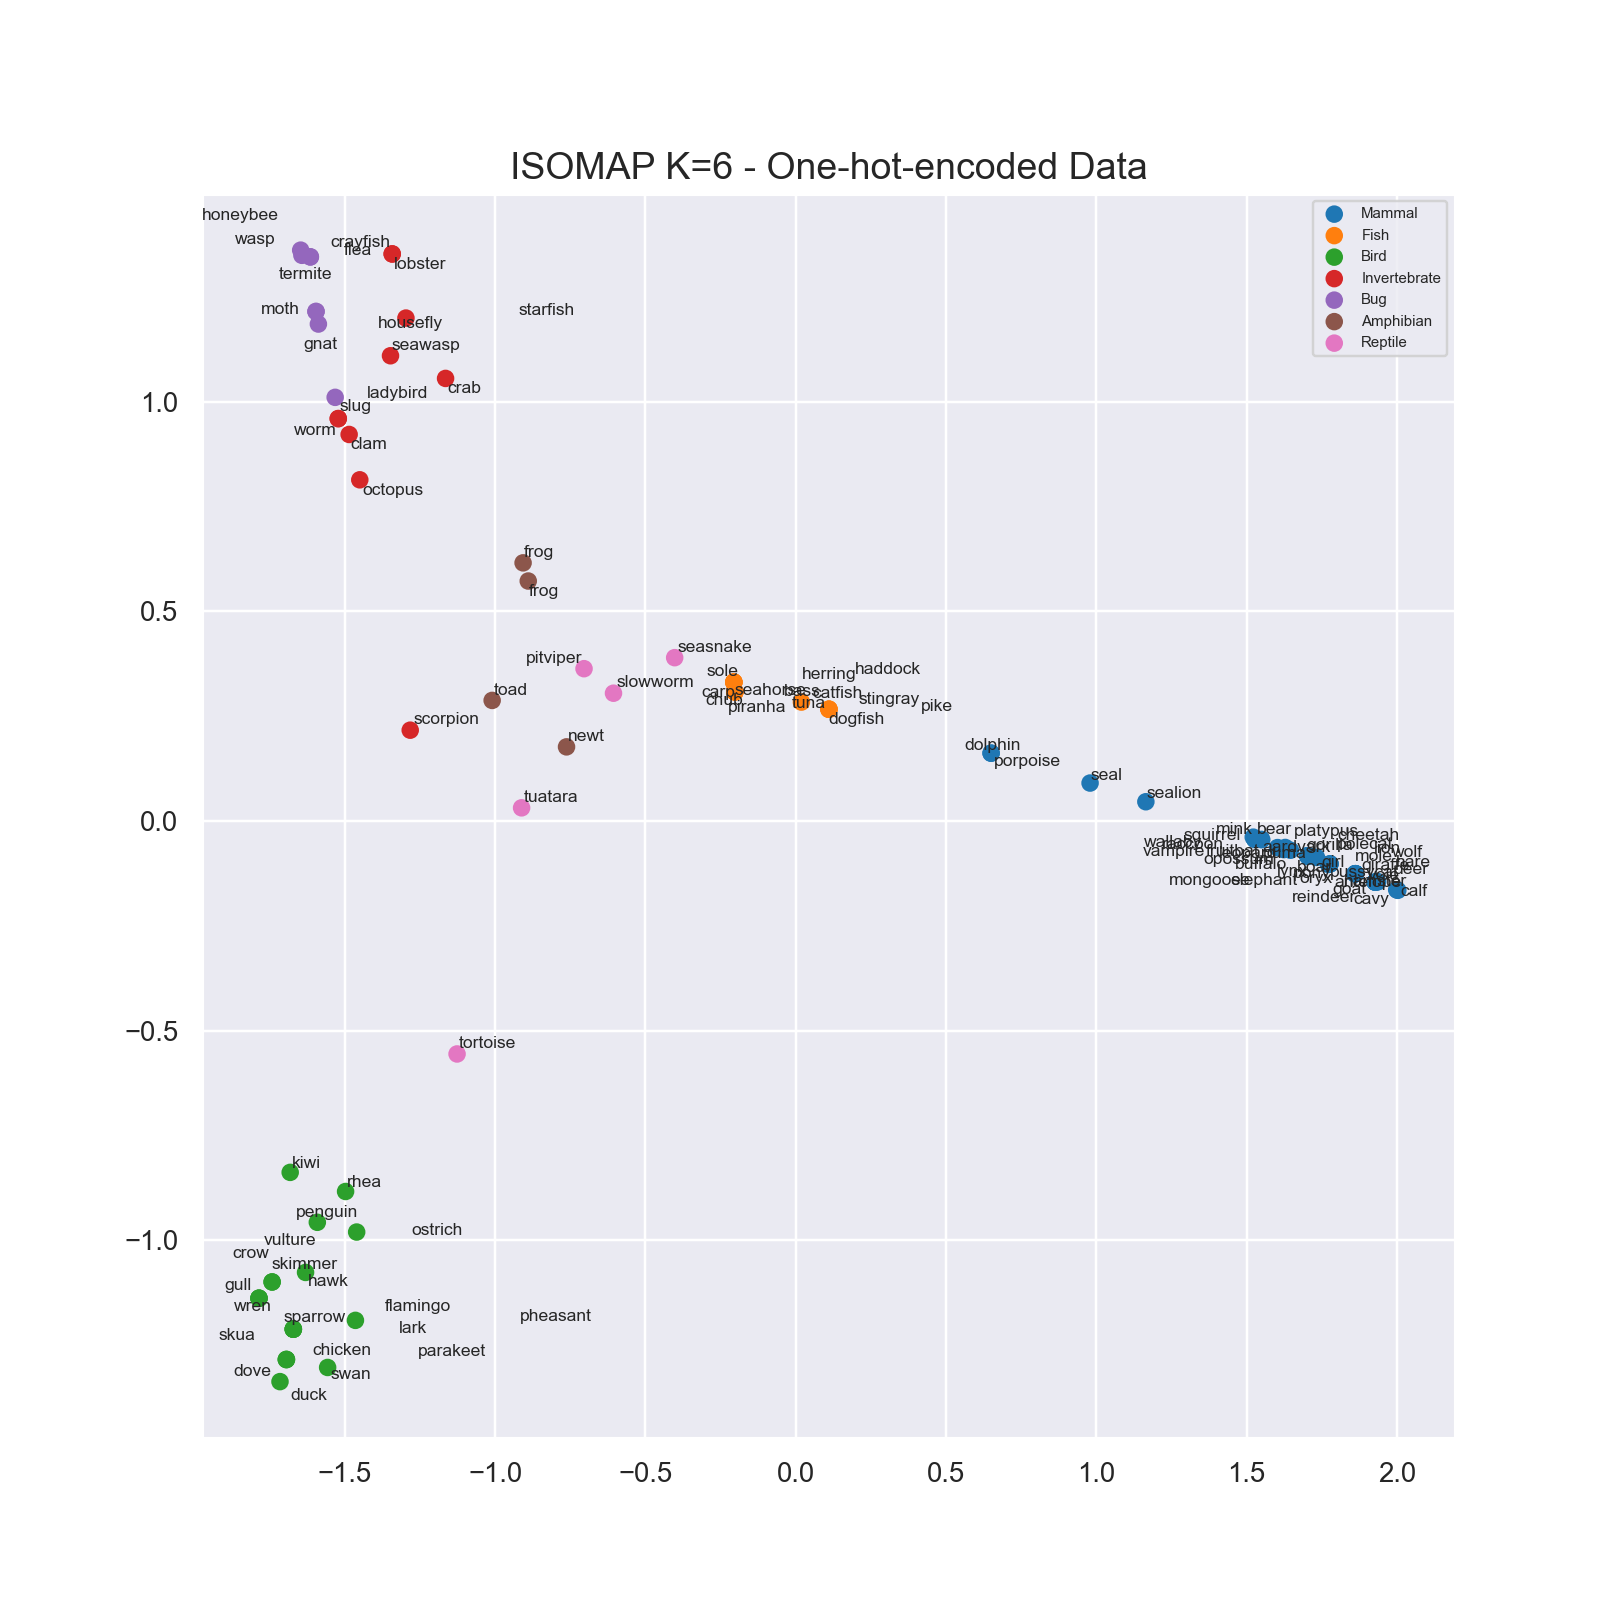

In [4]:
k = 6
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


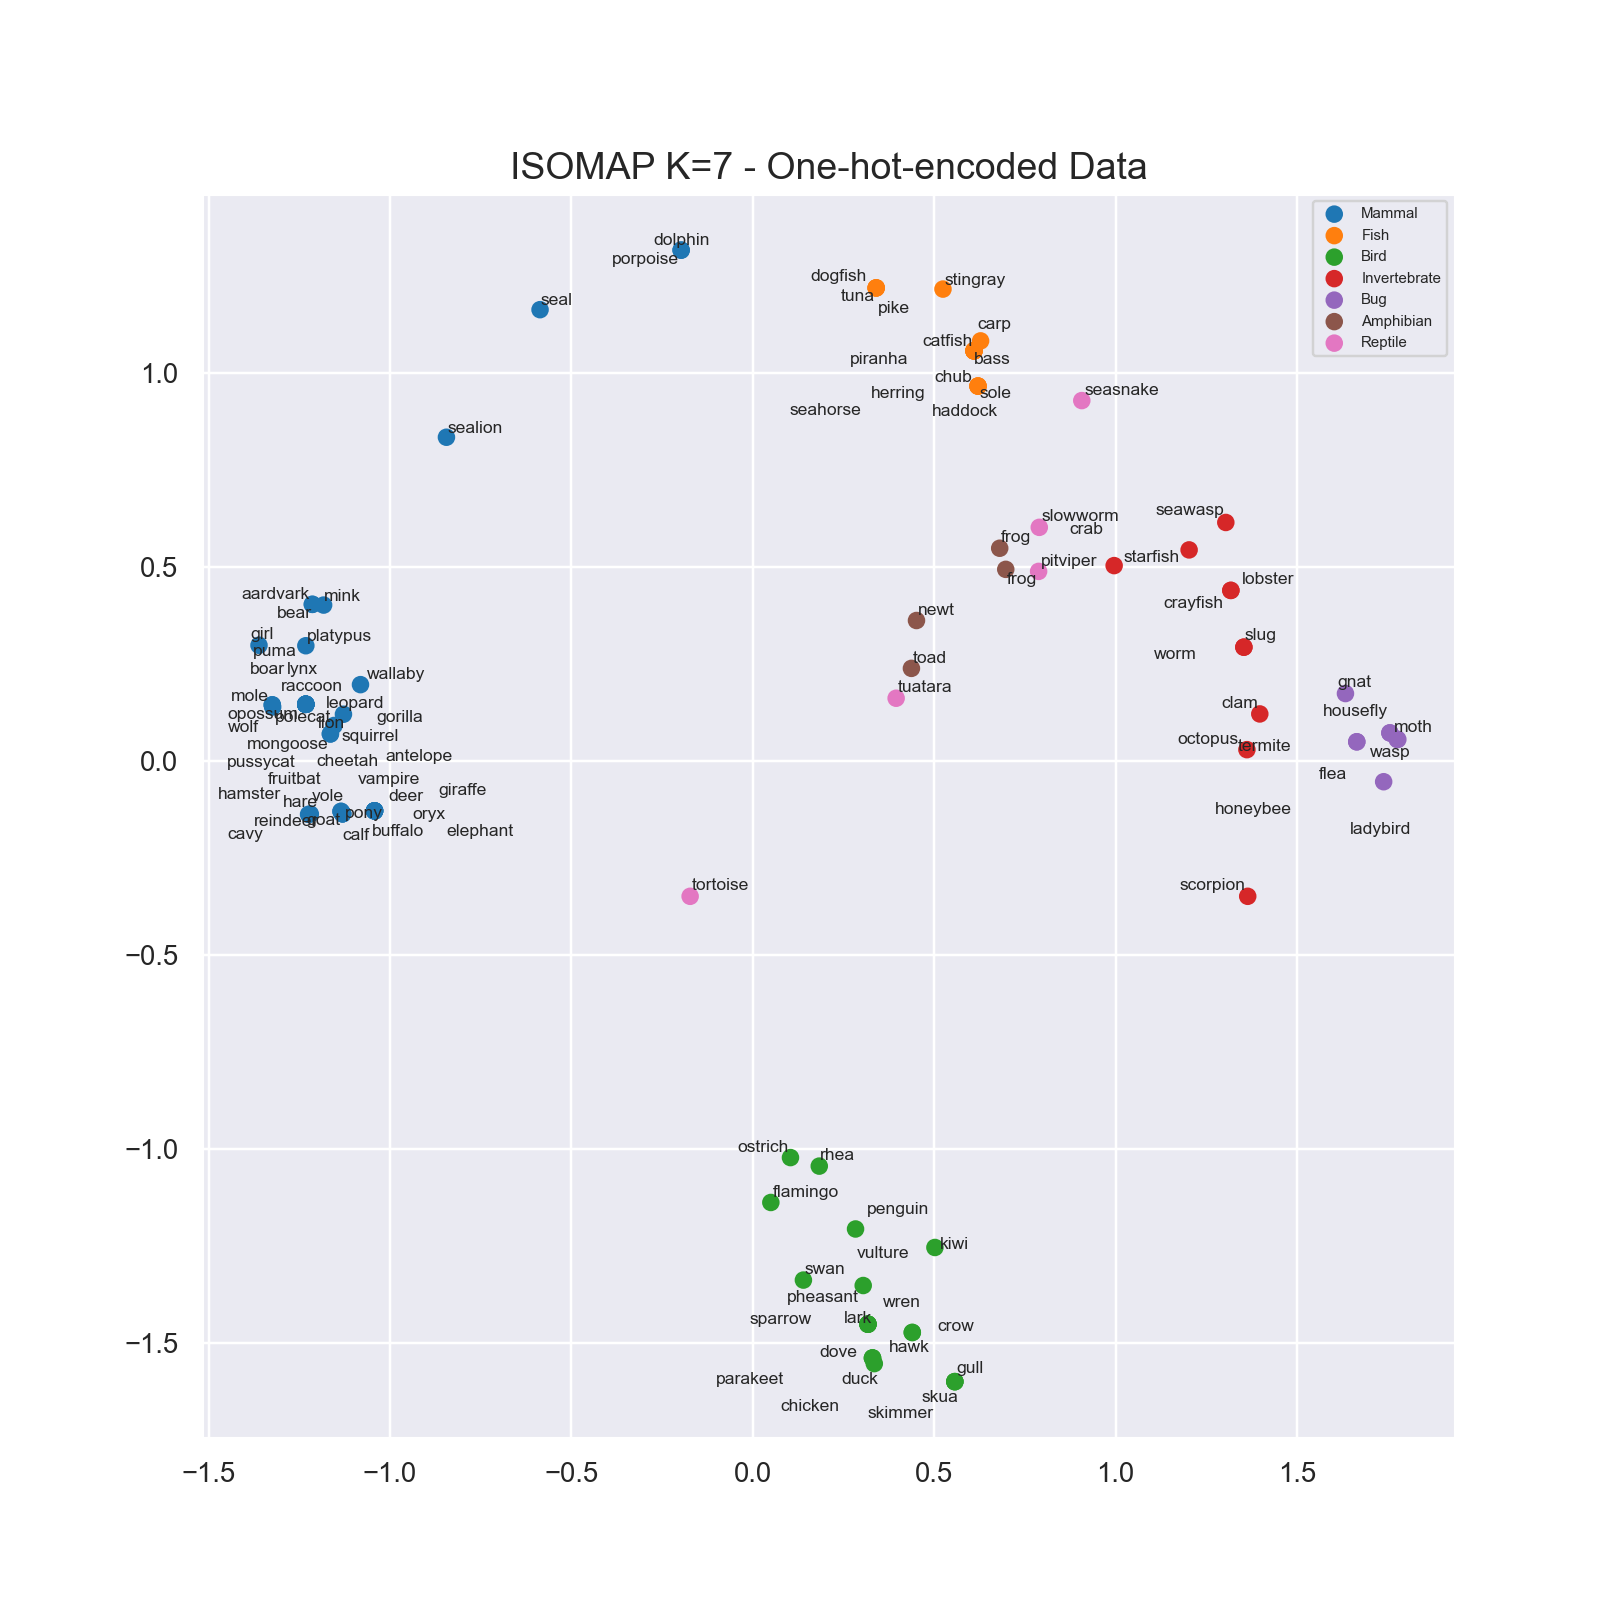

In [5]:
k = 7
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


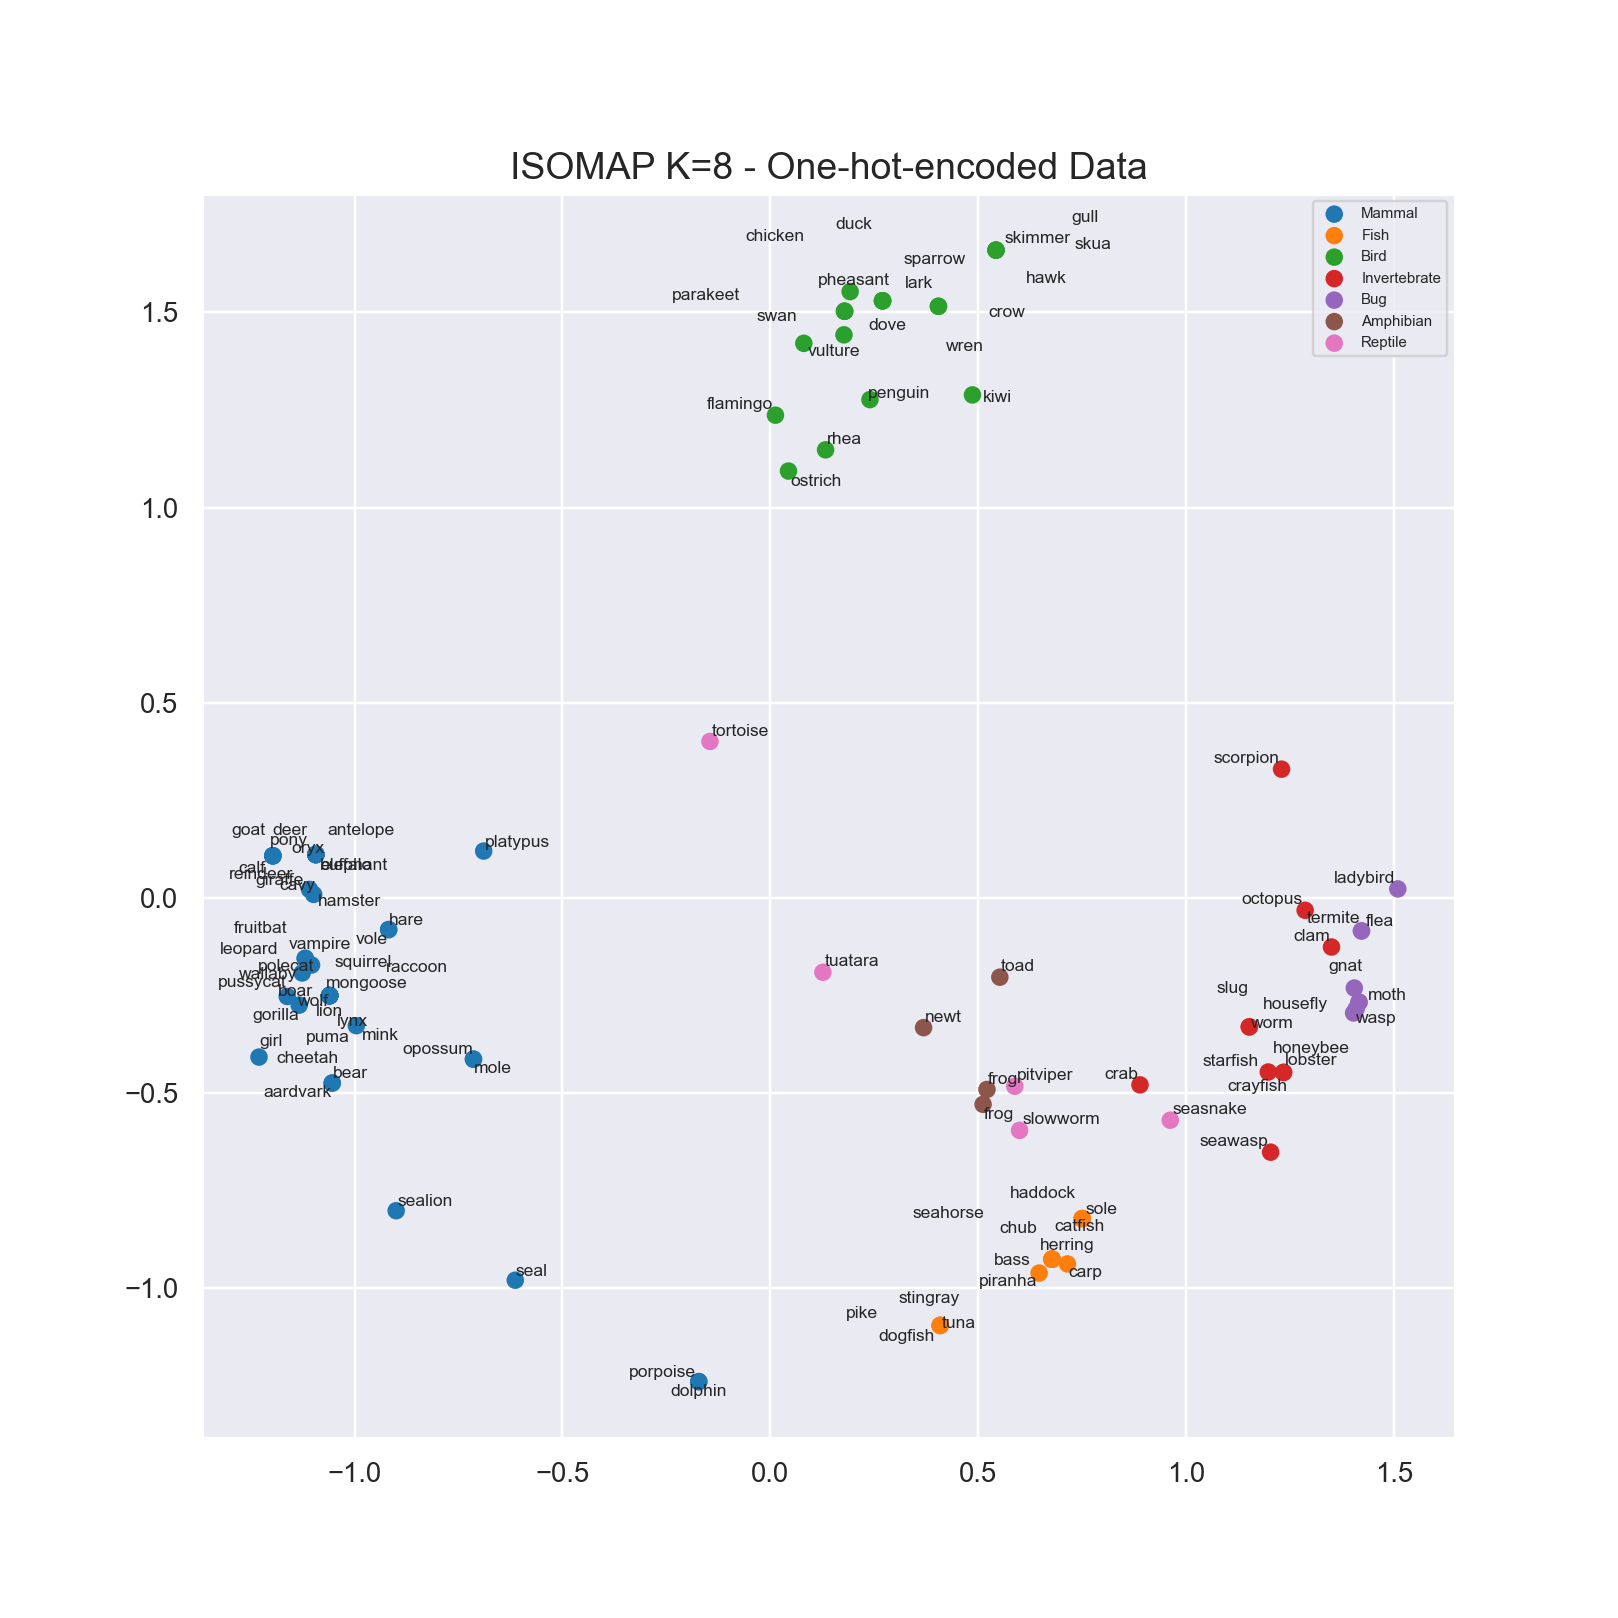

In [6]:
k = 8
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


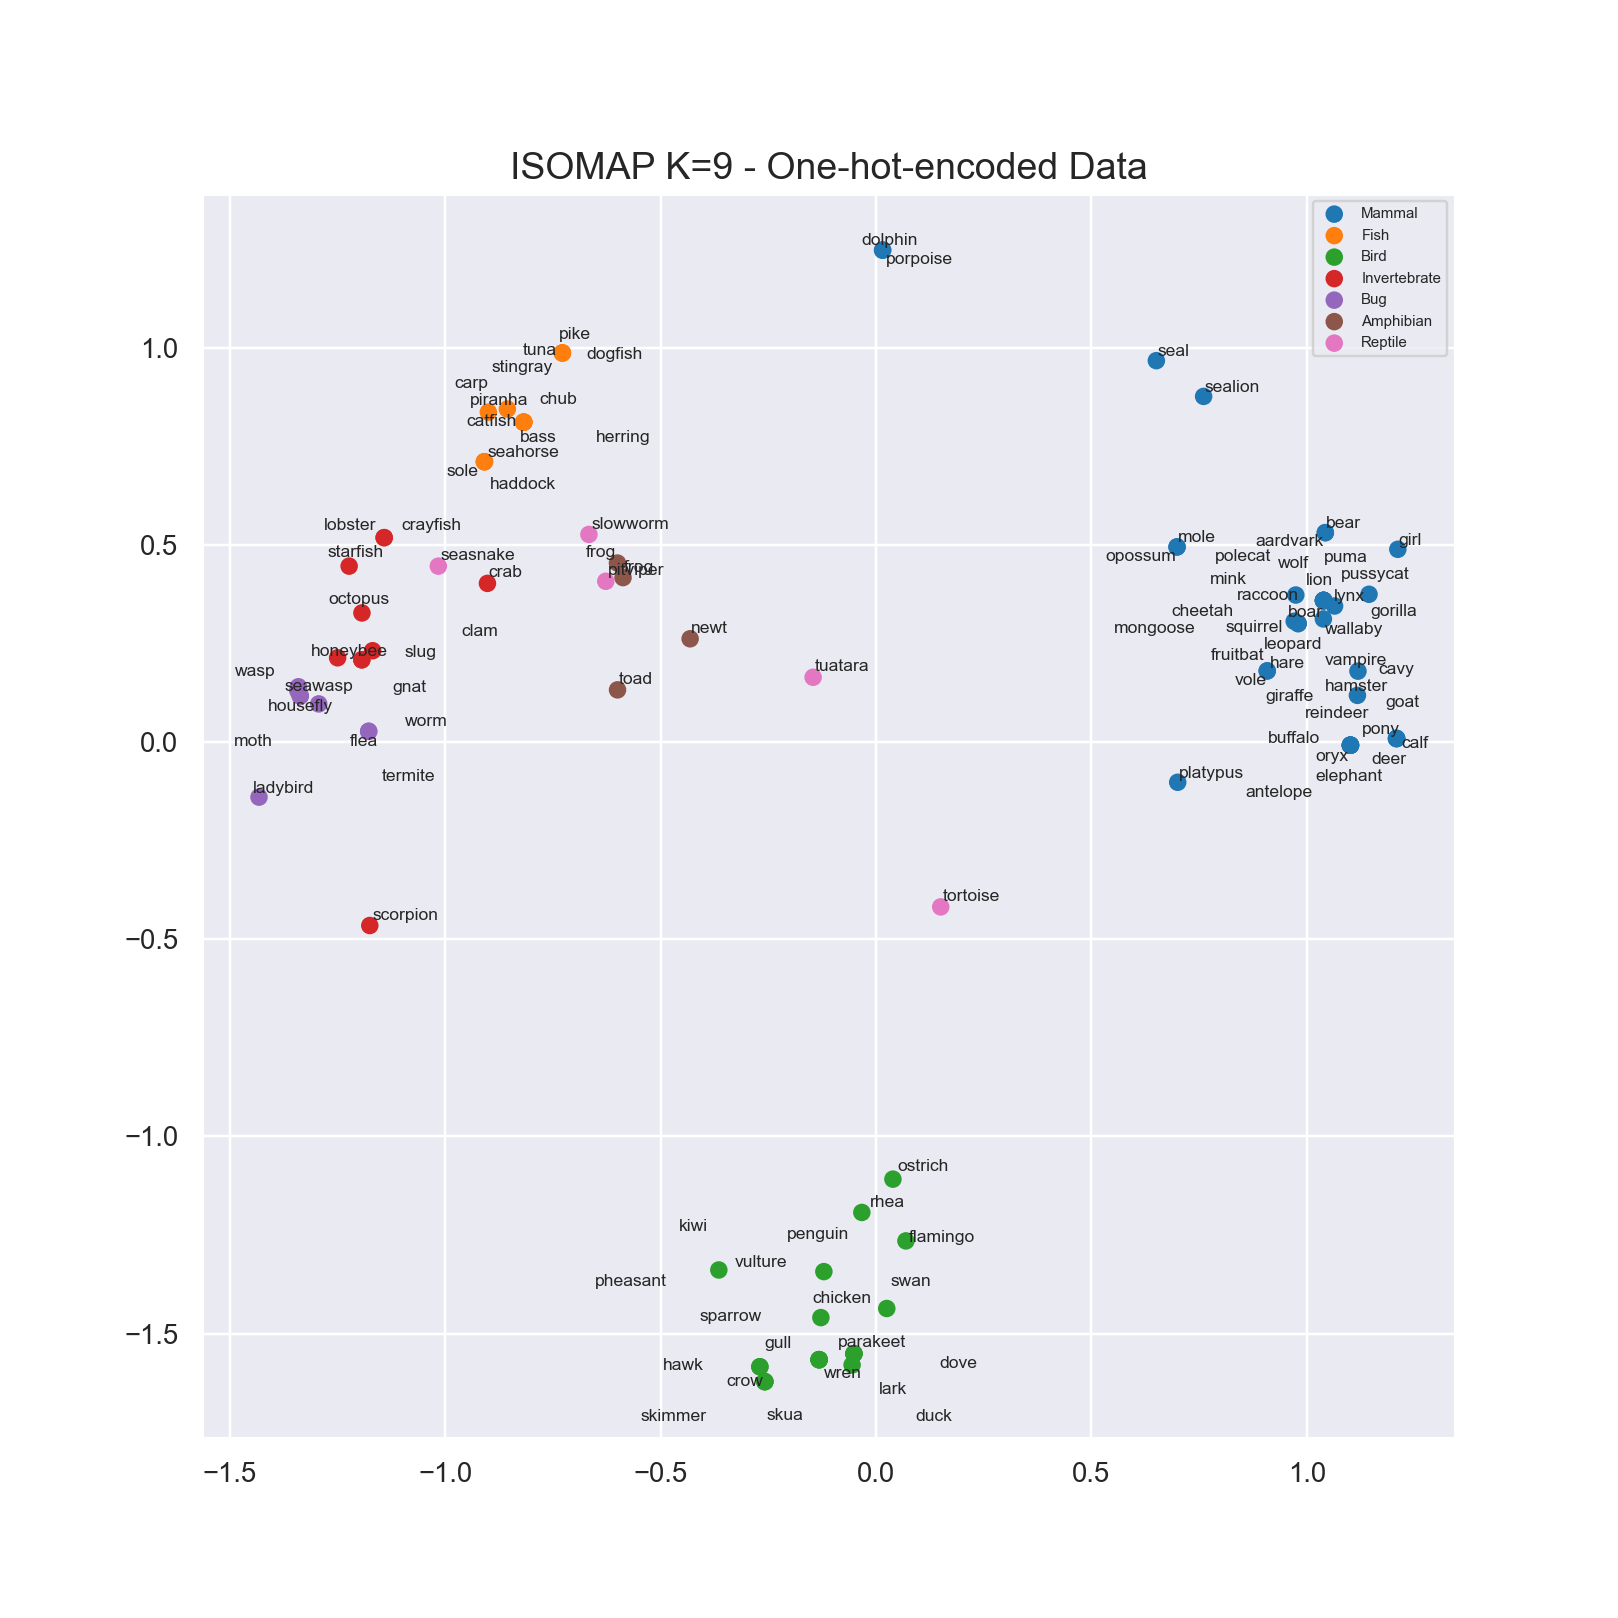

In [7]:
k = 9
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


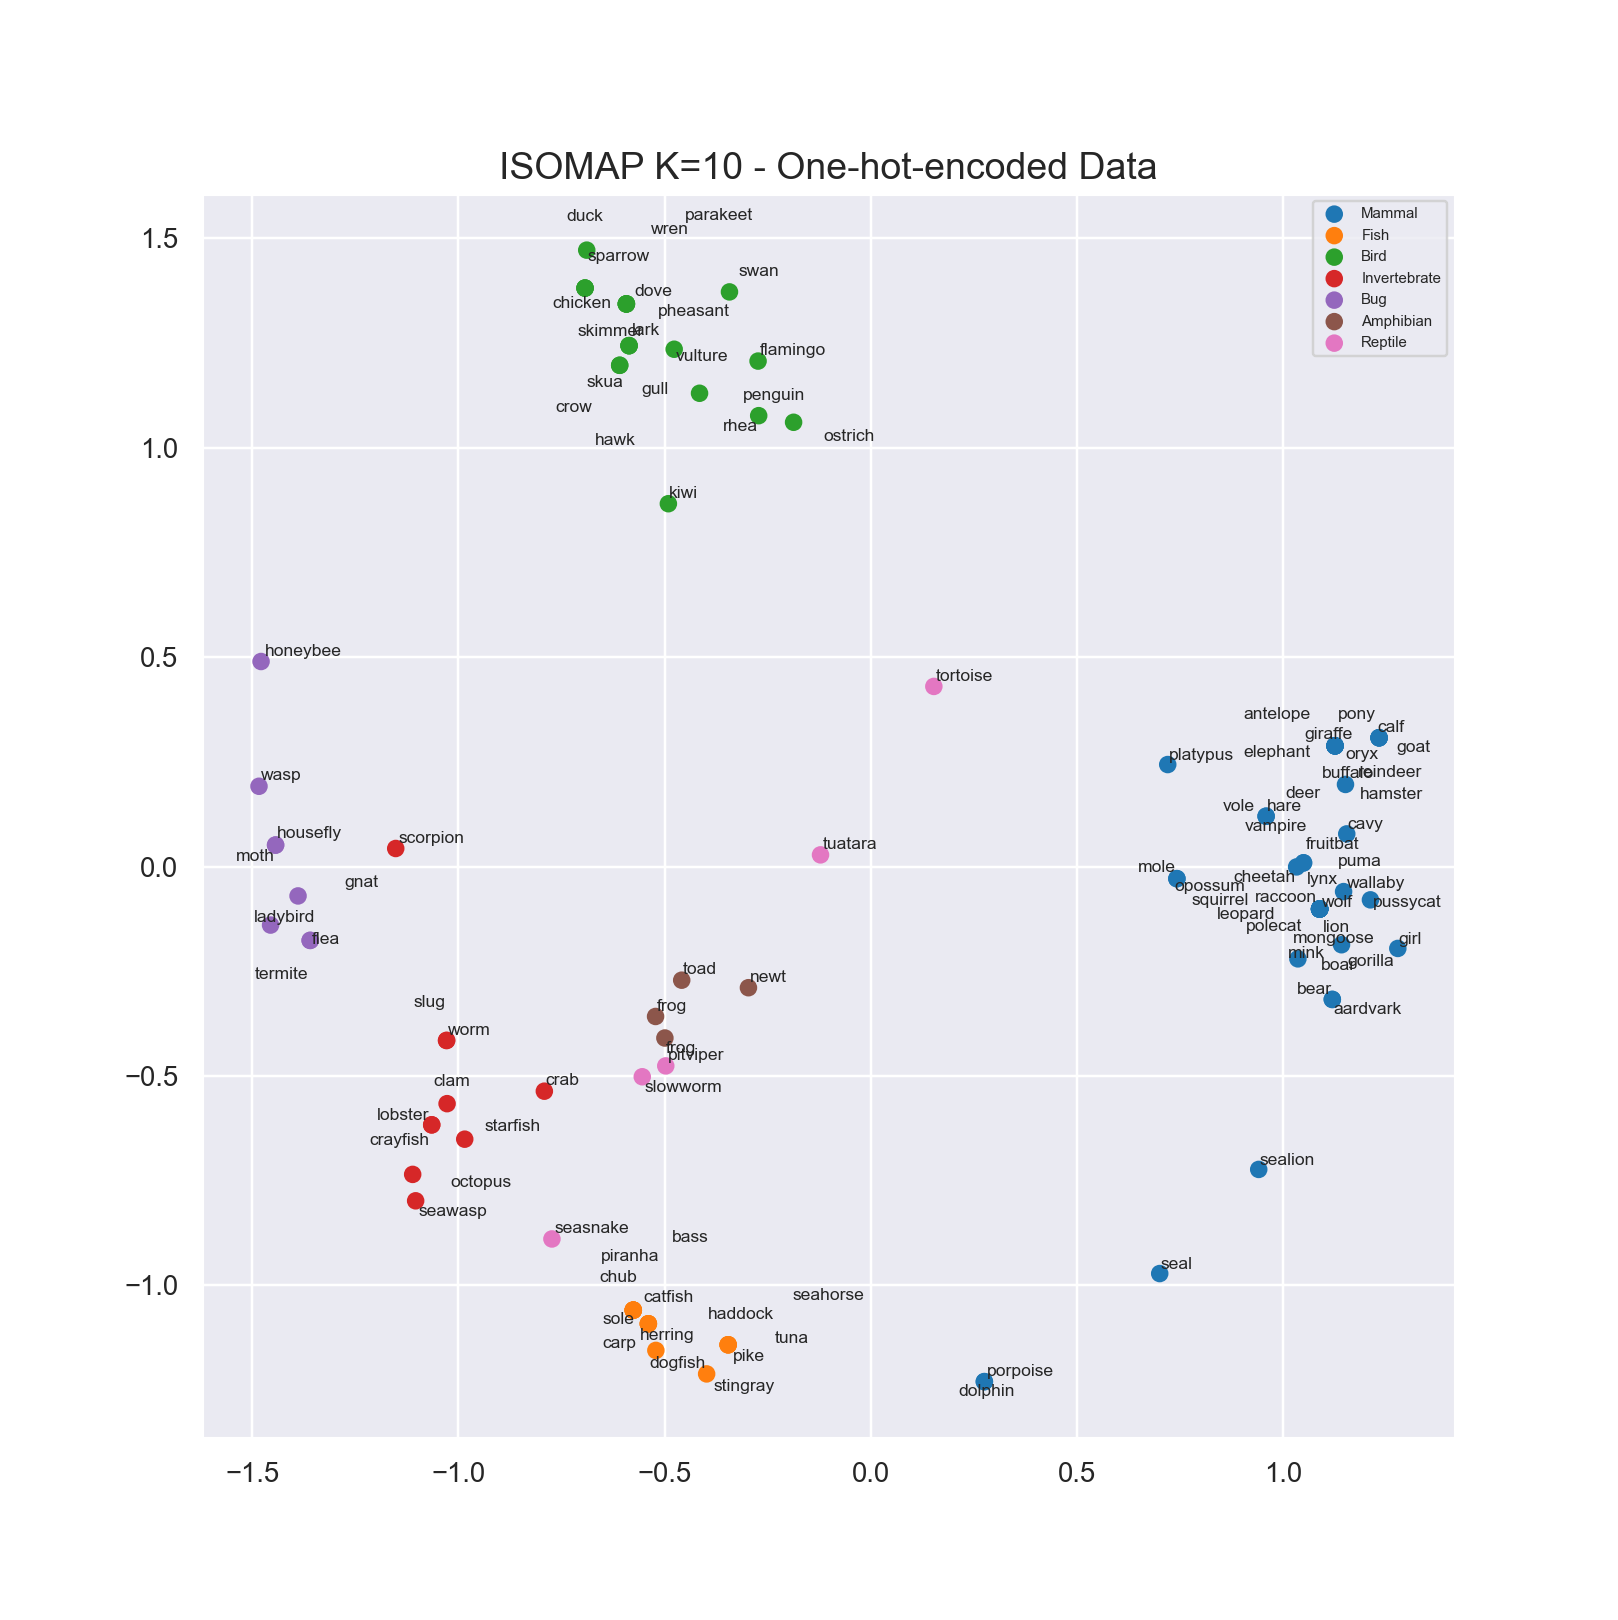

In [8]:
k = 10
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


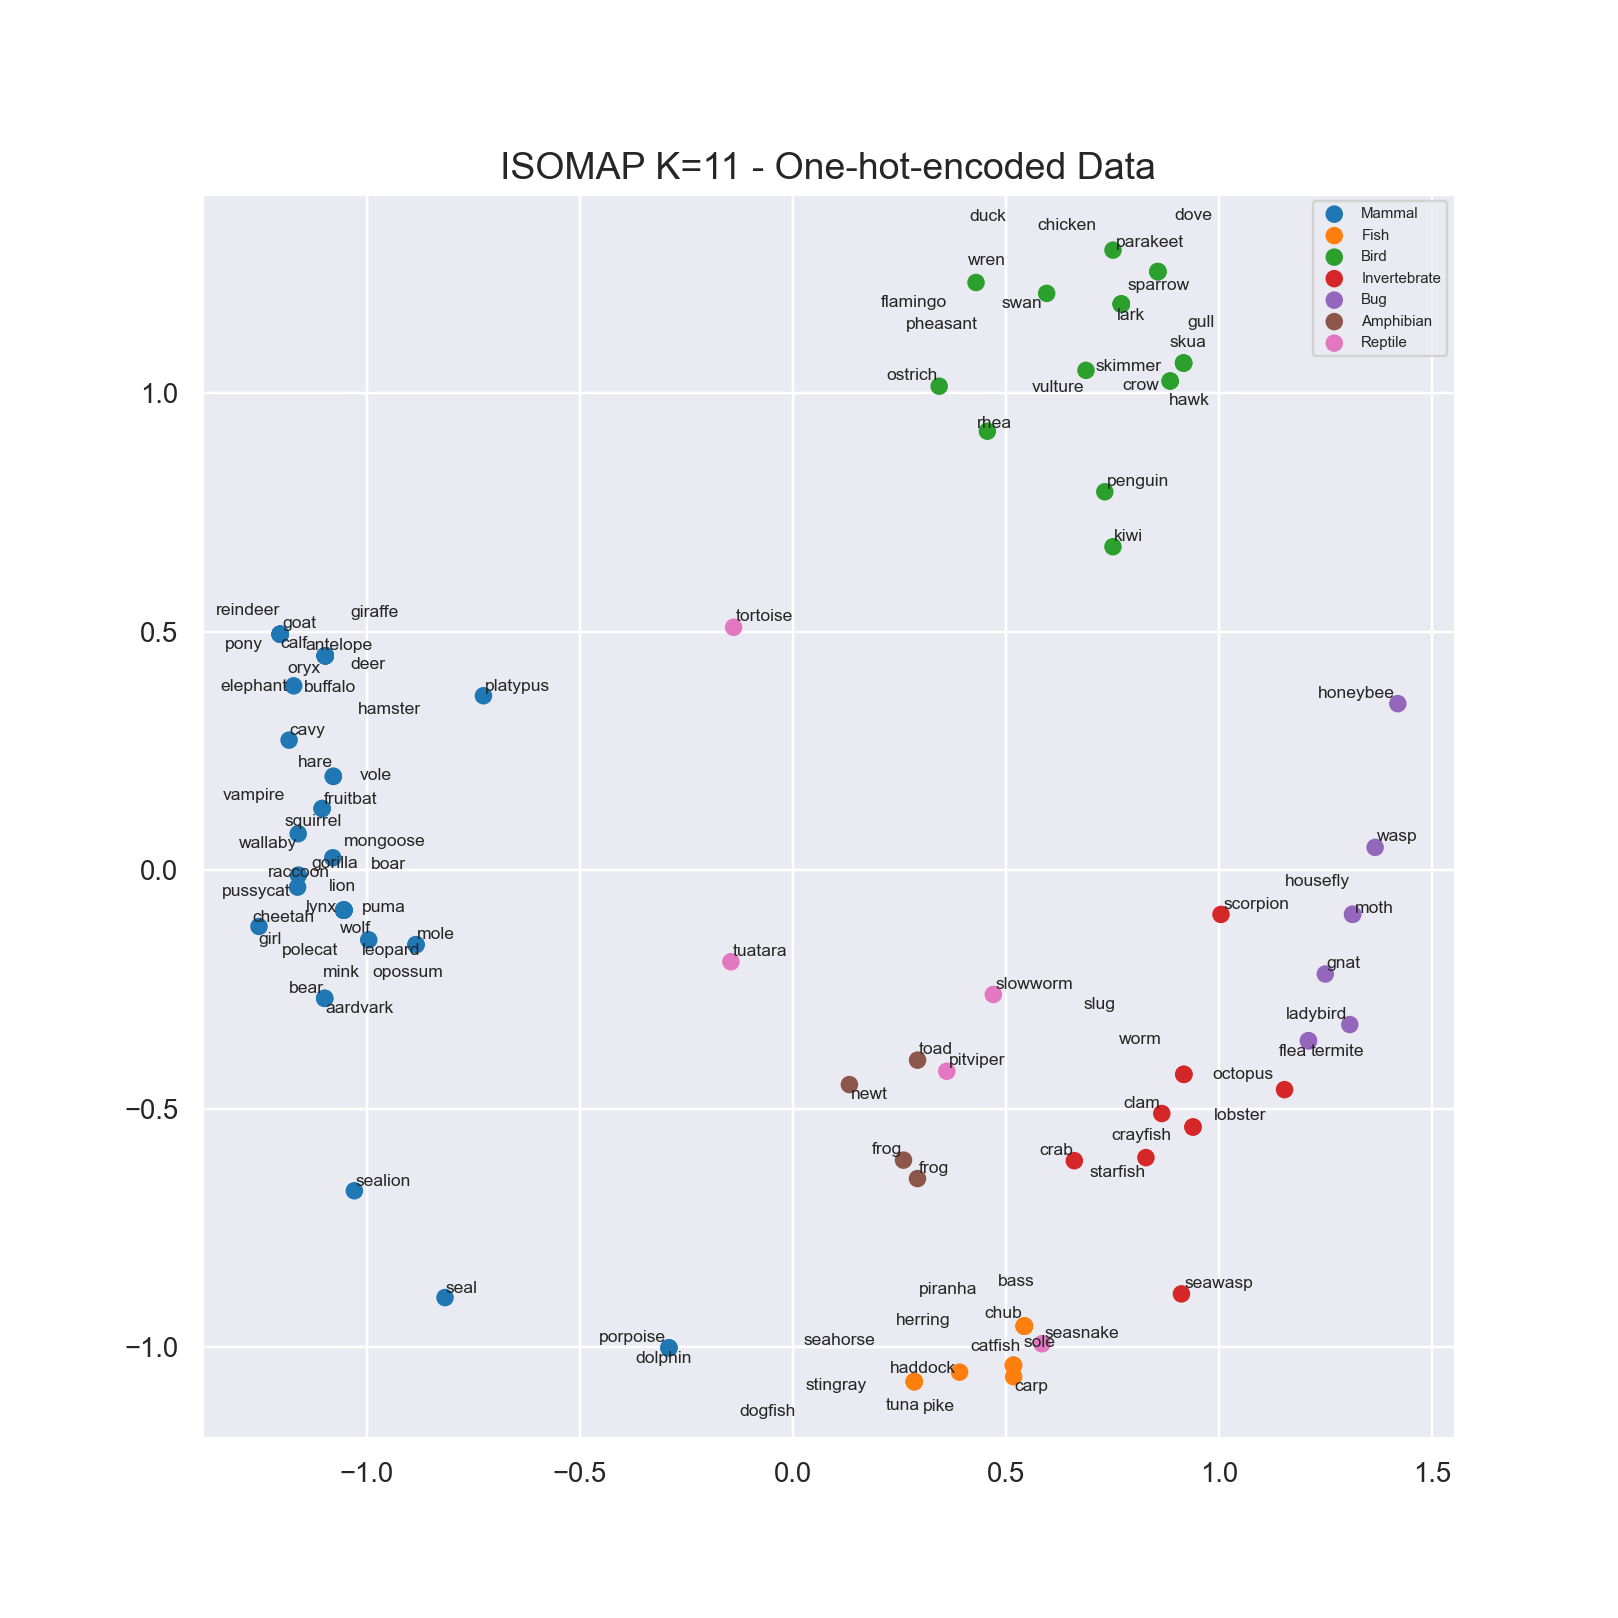

In [9]:
k = 11
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

<IPython.core.display.Javascript object>


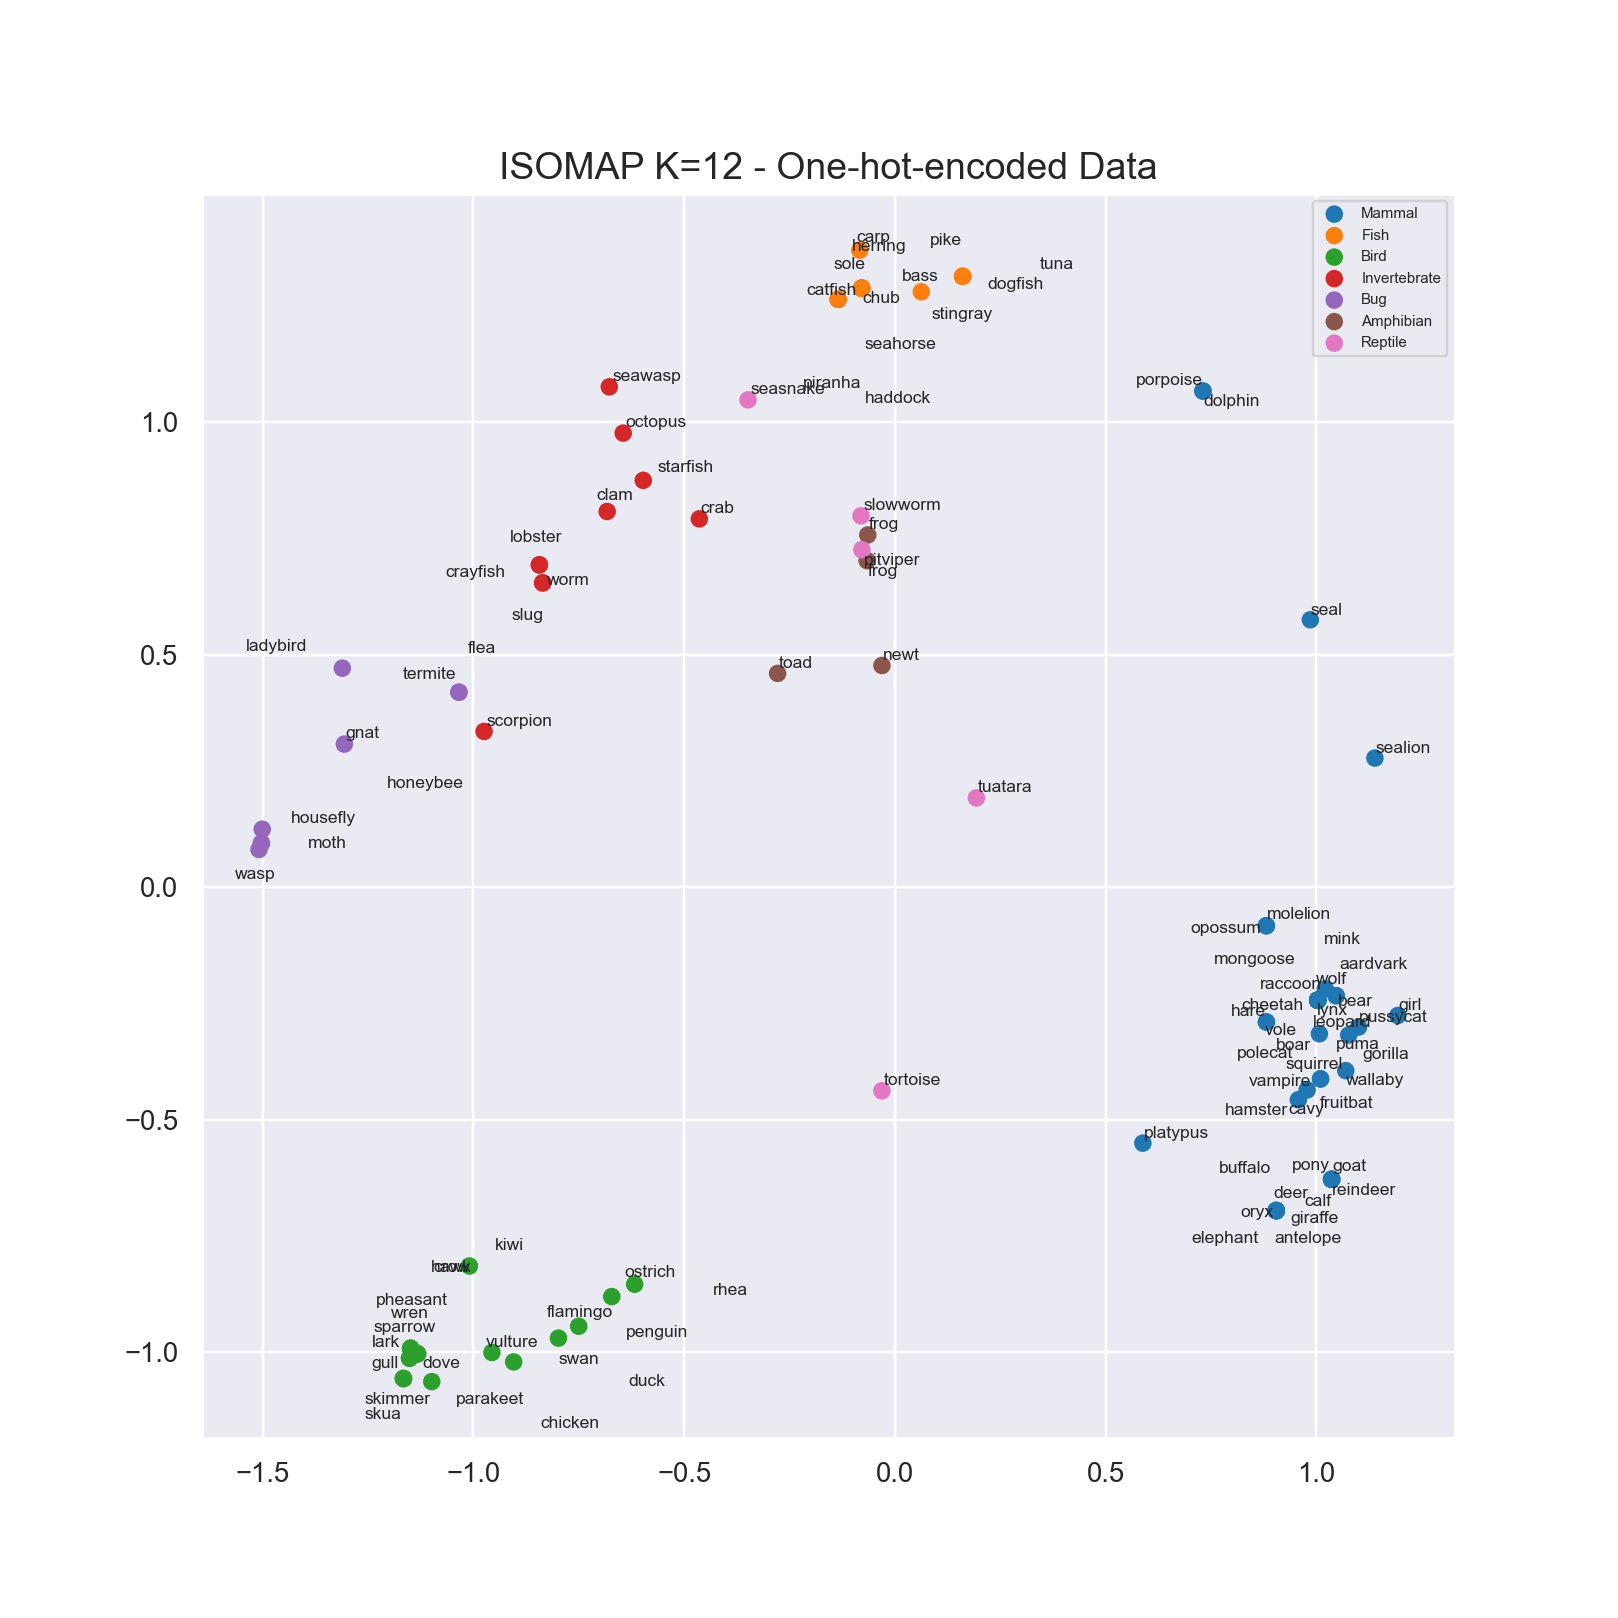

In [10]:
k = 12
ass1.iso_map(k)
ax = plot_scatter(ass1.animals_k_isomap_df, "ISOMAP K={} - One-hot-encoded Data".format(k), fsize=(5,5), axis_text = "")

array([84.01325155+0.j, 65.04697646+0.j, 31.75164112+0.j, 12.53443549+0.j,
       11.41862383+0.j,  8.08705923+0.j,  7.06984449+0.j,  6.15920731+0.j,
        4.90038685+0.j,  4.32273943+0.j])

<IPython.core.display.Javascript object>


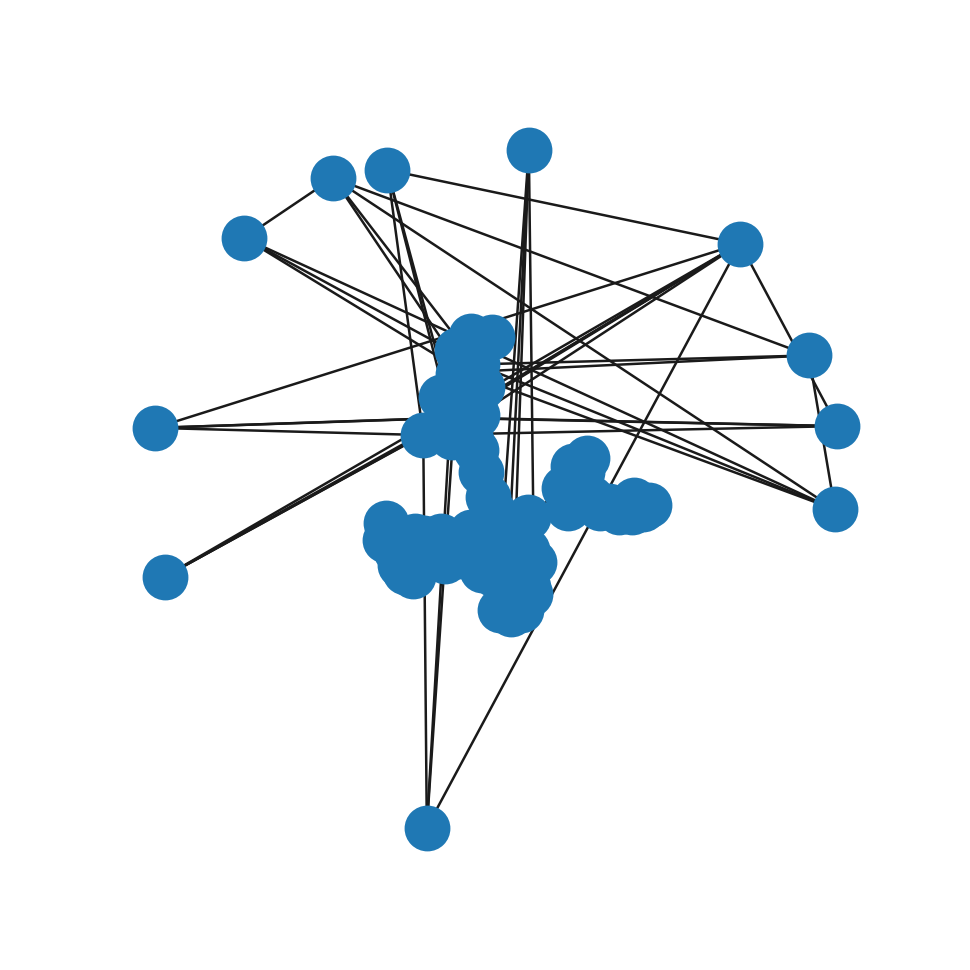

In [50]:
import networkx as nx 

k = 4
isomap_df, lamda, vl = ass1.iso_map(k)
lamda[0:10]

G = nx.from_scipy_sparse_matrix(ass1.nbrs_graph)

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
nx.draw(G)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()

In [18]:
def tst(**kwargs):
    test = {'s': 2, 'g': 7, 'j': 'hola'}
    print(test)
    test.update(kwargs)
    print(test['s'])
    

In [19]:
tst(g=3, j="ggg", k=4)

{'s': 2, 'g': 7, 'j': 'hola'}
2
